In [1]:
# modulos necessarios para rodar este notebook
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd

ox.config(log_console=True, use_cache=True)
weight_by_length = False

In [2]:
# cidades utilizadas para criar os graficos
# defina as cidades atraves do sistema
# label : query
places = {'Rio Branco'     : 'Rio Branco, AC, Brazil',
          'Maceió'         : 'Maceió, Alagoas, Brazil',
          'Macapá'         : 'Macapa, AP, Brazil',
          'Manaus'         : 'Manaus, AM, Brazil',
          'Salvador'       : 'Salvador, BA, Brazil',
          'Fortaleza'      : 'Fortaleza, CE, Brazil',
#          'Brasília'       : 'Brasília, Brazil',
          'Vitória'        : 'Vitoria, ES, Brazil',
          'Goiânia'        : 'Goiania, GO, Brazil',
          'São Luís'       : 'Sao Luis, MA, Brazil',
          'Cuiabá'         : 'Cuiaba, MT, Brazil',
          'Campo Grande'   : 'Campo Grande, MS, Brazil',
          'Belo Horizonte' : 'Belo Horizonte, MG, Brazil',
          'Belém'          : 'Belem, PA, Brazil',
          'João Pessoa'    : 'Joao Pessoa, PB, Brazil',
          'Curitiba'       : 'Curitiba, PR, Brazil',
          'Recife'         : 'Recife, PE, Brazil',
          'Teresina'       : 'Teresina, PI, Brazil',
          'Rio de Janeiro' : 'Rio de Janeiro, RJ, Brazil',
          'Natal'          : 'Natal, RN, Brazil',
          'Porto Alegre'   : 'Porto Alegre, RS, Brazil',
          'Porto Velho'    : 'Porto Velho, RO, Brazil',
          'Boa Vista'      : 'Boa Vista, RR, Brazil',
          'Florianópolis'  : 'Florianopolis, SC, Brazil',
          'São Paulo'      : 'Sao Paulo, SP, Brazil',
          'Aracaju'        : 'Aracaju, SE, Brazil',
          'Palmas'         : 'Palmas, TO, Brazil'}

In [3]:
# verificar os OSMnx geocodes para cada cidade buscada
# eh interessante para ver se as coordenadas
# geograficas fazem sentido
gdf = ox.gdf_from_places(places.values())
gdf

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-67.482000,-9.505000,-10.485000,-69.364000,"POLYGON ((-69.364 -10.463, -69.342 -10.485, -6...","Rio Branco, Microrregião de Rio Branco, Mesorr..."
1,-35.558000,-9.370000,-9.715995,-35.816000,"POLYGON ((-35.816 -9.577, -35.8152258 -9.57921...","Maceió, Microrregião de Maceió, Mesorregião Le..."
2,-49.892000,1.274000,-0.097000,-51.501000,"POLYGON ((-51.501 0.474, -51.489 0.464, -51.48...","Macapa, Microrregião de Macapá, Mesorregião Su..."
3,-59.160000,-1.924000,-3.222000,-60.801000,"POLYGON ((-60.801 -2.545, -60.764 -2.772, -60....","Manaus, Microrregião de Manaus, Mesorregião Ce..."
4,-38.303414,-12.733537,-13.017395,-38.699435,"POLYGON ((-38.6994346 -12.7945191, -38.699 -12...","SSA, Microrregião de Salvador, Região Metropol..."
5,-38.401541,-3.691979,-3.888124,-38.636568,"POLYGON ((-38.6365679 -3.8005876, -38.6354433 ...","Fortaleza, Microrregião de Fortaleza, Mesorreg..."
6,-28.847608,-20.229164,-20.529631,-40.362332,"(POLYGON ((-40.3623322 -20.3118208, -40.361999...","Vitória, Microrregião Vitória, Greater Vitória..."
7,-49.078000,-16.453000,-16.831832,-49.446637,"POLYGON ((-49.4466371 -16.7164474, -49.4361089...","Goiânia, Microrregião de Goiânia, Mesorregião ..."
8,-44.162979,-2.454000,-2.800000,-44.434000,"POLYGON ((-44.434 -2.8, -44.401 -2.796, -44.38...","São Luís, Microrregião da Aglomeração Urbana d..."
9,-55.464000,-15.071000,-15.767005,-56.303238,"POLYGON ((-56.3032383 -15.2521674, -56.282 -15...","Cuiabá, Microrregião de Cuiabá, Mesorregião Ce..."


In [4]:
# pegar as estruturas da ruas
def reverse_bearing(x):
    return x + 180 if x < 180 else x - 180

In [5]:
bearings = {}
for place in sorted(places.keys()):
    
    # get the graph
    query = places[place]
    G = ox.graph_from_place(query, network_type='drive')
    
    # calculate edge bearings
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    
    if weight_by_length:
        # weight bearings by length (meters)
        city_bearings = []
        for u, v, k, d in Gu.edges(keys=True, data=True):
            city_bearings.extend([d['bearing']] * int(d['length']))
        b = pd.Series(city_bearings)
        bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')
    else:
        # don't weight bearings, just take one value per street segment
        b = pd.Series([d['bearing'] for u, v, k, d in Gu.edges(keys=True, data=True)])
        bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')

In [6]:
# visualizacao
def count_and_merge(n, bearings):
    # make twice as many bins as desired, then merge them in pairs
    # prevents bin-edge effects around common values like 0° and 90°
    n = n * 2
    bins = np.arange(n + 1) * 360 / n
    count, _ = np.histogram(bearings, bins=bins)
    
    # move the last bin to the front, so eg 0.01° and 359.99° will be binned together
    count = np.roll(count, 1)
    return count[::2] + count[1::2]

In [7]:
# funcao para fazer os graficos polares
def polar_plot(ax, bearings, n=36, title=''):

    bins = np.arange(n + 1) * 360 / n
    count = count_and_merge(n, bearings)
    _, division = np.histogram(bearings, bins=bins)
    frequency = count / count.sum()
    division = division[0:-1]
    width =  2 * np.pi / n

    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')

    x = division * np.pi / 180
    bars = ax.bar(x, height=frequency, width=width, align='center', bottom=0, zorder=2,
                  color='#003366', edgecolor='k', linewidth=0.5, alpha=0.7)
    
    ax.set_ylim(top=frequency.max())
    
    title_font = {'family':'Century Gothic', 'size':24, 'weight':'bold'}
    xtick_font = {'family':'Century Gothic', 'size':10, 'weight':'bold', 'alpha':1.0, 'zorder':3}
    ytick_font = {'family':'Century Gothic', 'size': 9, 'weight':'bold', 'alpha':0.2, 'zorder':3}
    
    ax.set_title(title.upper(), y=1.05, fontdict=title_font)
    
    ax.set_yticks(np.linspace(0, max(ax.get_ylim()), 5))
    yticklabels = ['{:.2f}'.format(y) for y in ax.get_yticks()]
    yticklabels[0] = ''
    ax.set_yticklabels(labels=yticklabels, fontdict=ytick_font)
    
    xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
    ax.set_xticklabels(labels=xticklabels, fontdict=xtick_font)
    ax.tick_params(axis='x', which='major', pad=-2)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: 'images/street-orientations.png'

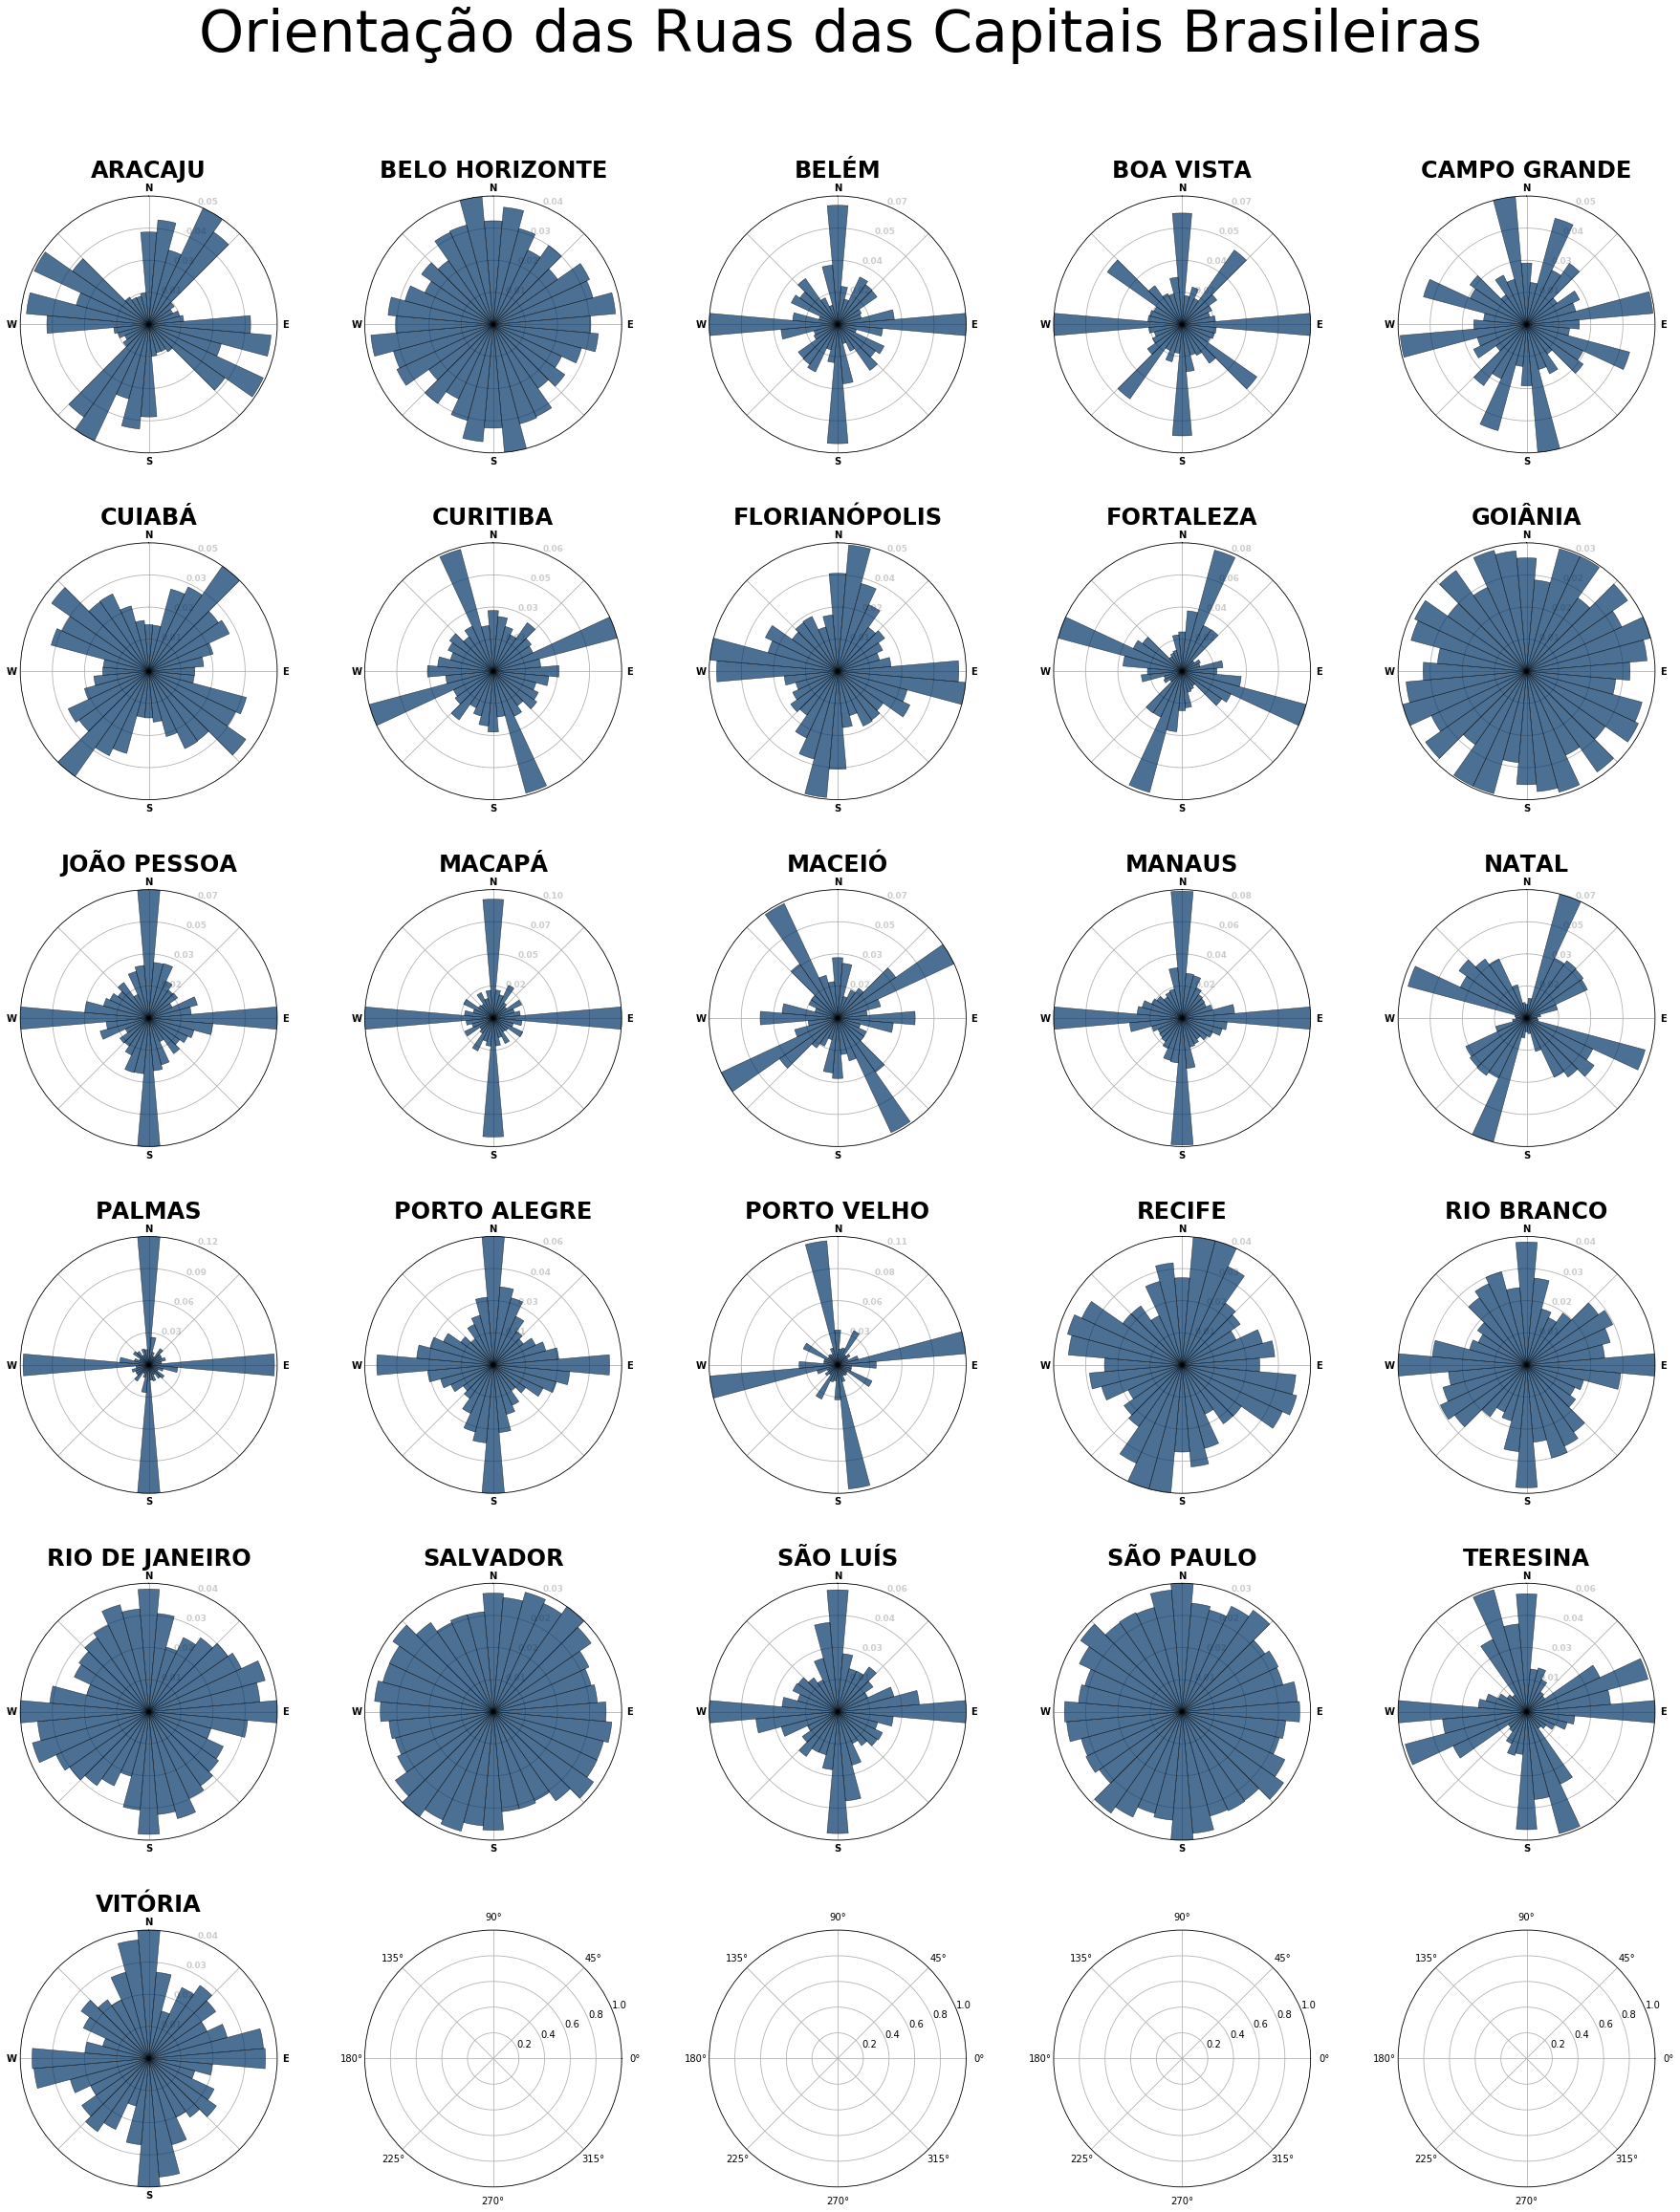

In [8]:
# exporta os graficos
n = len(places)
#ncols = int(np.ceil(np.sqrt(n)))
#nrows = int(np.ceil(n / ncols))
ncols = 5
nrows = 6
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={'projection':'polar'})

# faz o grafico de cada cidade considerada
for ax, place in zip(axes.flat, sorted(places.keys())):
    polar_plot(ax, bearings[place].dropna(), title=place)

# adiciona um titulo geral e salva tudo em uma figura soh
suptitle_font = {'family':'Century Gothic', 'fontsize':60, 'fontweight':'normal', 'y':1.07}
fig.suptitle('Orientação das Ruas das Capitais Brasileiras', **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig('images/street-orientations.png', dpi=120, bbox_inches='tight')
plt.close()